In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import random
import cv2
import copy

In [49]:
CODE_PATH = os.getcwd()
os.chdir('..')
BASE_PATH = os.getcwd()
os.chdir(CODE_PATH)
DATA_PATH = os.path.join(BASE_PATH, 'Data')

Text(0.5, 1.0, 'Example Clean Image')

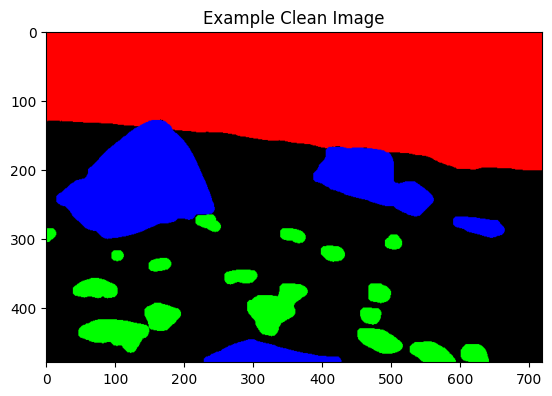

In [50]:
example = plt.imread(os.path.join(DATA_PATH,'images', 'clean','clean0015.png'))
plt.imshow(example)
plt.title("Example Clean Image")

In [57]:
# Showing RGB values per class
print(example.shape)

print('\n\n')
print('Blue - Big Rocks - Using plt.imread():', example[250][100][:])
print('Green - Small Rocks - Using plt.imread():', example[440][100][:])
print('Red - Sky - Using plt.imread():', example[50][300][:])
print('Grey - Big Rocks - Using plt.imread():', example[460][25][:])
print('plt.imread() does [R G B] and 0-1')
# Might need to change the preprocessor functions to note rescale from 0-255 to 0-1 depending
# on which method we use to load in the functions

example_from_cv2 = cv2.imread(os.path.join(DATA_PATH,'images', 'clean','clean0015.png'))
print('\n\n')
print('Blue - Big Rocks: - Using cv2.imread()', example_from_cv2[250][100][:])
print('Green - Small Rocks - Using plt.imread():', example_from_cv2[440][100][:])
print('Red - Sky - Using plt.imread():', example_from_cv2[50][300][:])
print('Grey - Big Rocks - Using plt.imread():', example_from_cv2[460][25][:])
print('cv2.imread() does [B G R] and 0-255')


(480, 720, 3)



Blue - Big Rocks - Using plt.imread(): [0. 0. 1.]
Green - Small Rocks - Using plt.imread(): [0. 1. 0.]
Red - Sky - Using plt.imread(): [1. 0. 0.]
Grey - Big Rocks - Using plt.imread(): [0. 0. 0.]
plt.imread() does [R G B] and 0-1



Blue - Big Rocks: - Using cv2.imread() [255   0   0]
Green - Small Rocks - Using plt.imread(): [  0 255   0]
Red - Sky - Using plt.imread(): [  0   0 255]
Grey - Big Rocks - Using plt.imread(): [0 0 0]
cv2.imread() does [B G R] and 0-255


In [4]:
df = pd.read_csv(os.path.join(DATA_PATH, 'images_summary.csv'))
df = df.drop(columns = 'Unnamed: 0')

In [5]:
df

,image,reds,greens,blues,blacks
0,clean5687.png,45185,1178,1035,298202
1,clean0259.png,30097,0,0,315503
2,clean3816.png,54816,9340,5425,276019
3,clean9485.png,121909,0,1107,222584
4,clean1576.png,37348,15660,4957,287635
...,...,...,...,...,...
9761,clean7704.png,97538,5316,8658,234088
9762,clean8991.png,16295,12701,0,316604
9763,clean2060.png,139448,1166,2430,202556
9764,clean8331.png,47971,3925,1773,291931


In [6]:
melted = df.melt(id_vars = ['image'], value_vars = ['reds', 'greens', 'blues', 'blacks'], var_name = 'pixel_cat')

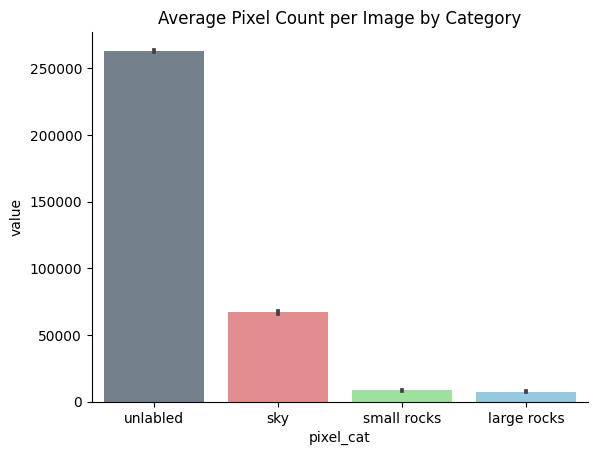

In [7]:
palette = {
    'reds':'light_coral',
    'greens':'lightgreen',
    'blues':'mediumturquoise',
    'blacks':'slategray'
}
melted = melted.replace({'blacks':'unlabled', 'reds':'sky', 'greens':'small rocks', 'blues':'large rocks'})
fig, ax = plt.subplots(nrows = 1, ncols = 1)
sns.barplot(data = melted, x = 'pixel_cat', y = 'value', palette = ['slategrey', 'lightcoral', 'lightgreen', 'skyblue'],
            order = melted.groupby('pixel_cat').mean().sort_values(by = 'value', ascending = False).index)
ax.set_title('Average Pixel Count per Image by Category')
sns.despine()

In [8]:
df['sky_perc'] = df.apply(lambda x: x.reds/(x.reds+x.blues+x.greens+x.blacks), axis = 1)
df['largerocks_perc'] = df.apply(lambda x: x.blues/(x.reds+x.blues+x.greens+x.blacks), axis = 1)
df['unlabeled_perc'] = df.apply(lambda x: x.blacks/(x.reds+x.blues+x.greens+x.blacks), axis = 1)
df['smallrocks_perc'] = df.apply(lambda x: x.greens/(x.reds+x.blues+x.greens+x.blacks), axis = 1)

melted_perc = df.melt(id_vars = ['image'], value_vars = ['sky_perc', 'smallrocks_perc', 'largerocks_perc', 'unlabeled_perc'], var_name = 'pixel_cat')

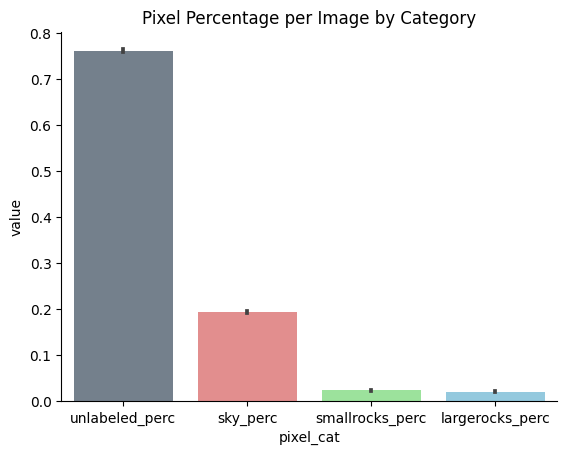

In [9]:
fig, ax = plt.subplots(nrows = 1, ncols = 1)
sns.barplot(data = melted_perc, x = 'pixel_cat', y = 'value', order = melted_perc.groupby('pixel_cat').mean().sort_values(by = 'value', ascending = False).index,
            palette = ['slategrey', 'lightcoral', 'lightgreen', 'skyblue'])
ax.set_title('Pixel Percentage per Image by Category')
sns.despine()

In [10]:
df['has_sky'] = df.reds > 0
df['has_smallrocks'] = df.greens > 0
df['has_largerocks'] = df.blues > 0
df['has_unlabeled'] = df.blacks > 0
num_images = df.groupby('image').count().shape[0]
num_images
dat = df.sum()[['has_sky', 'has_smallrocks', 'has_largerocks', 'has_unlabeled']]/num_images * 100
dat = dat.sort_values(ascending = False)

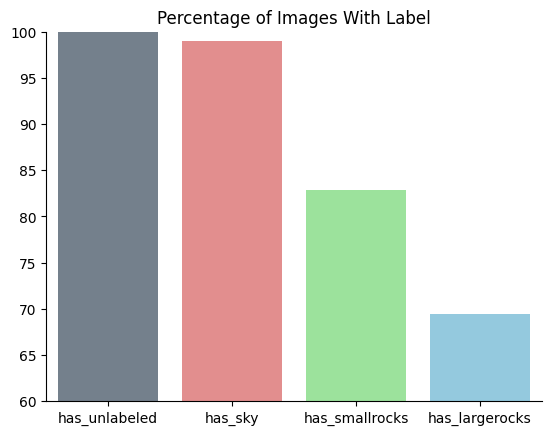

In [11]:
fig, ax = plt.subplots(nrows = 1, ncols = 1)
sns.barplot(x = dat.index, y = dat.values, palette = ['slategrey', 'lightcoral', 'lightgreen', 'skyblue'])
ax.set_title('Percentage of Images With Label')
ax.set_ylim((60,100))
sns.despine()

In [12]:
red_dat = np.load(os.path.join(DATA_PATH, 'red_dat.npy'))
blue_dat = np.load(os.path.join(DATA_PATH, 'blue_dat.npy'))
green_dat = np.load(os.path.join(DATA_PATH, 'green_dat.npy'))
black_dat = np.load(os.path.join(DATA_PATH, 'black_dat.npy'))

In [13]:
red_hm = pd.DataFrame(red_dat)
blue_hm = pd.DataFrame(blue_dat)
green_hm = pd.DataFrame(green_dat)
black_hm = pd.DataFrame(black_dat)

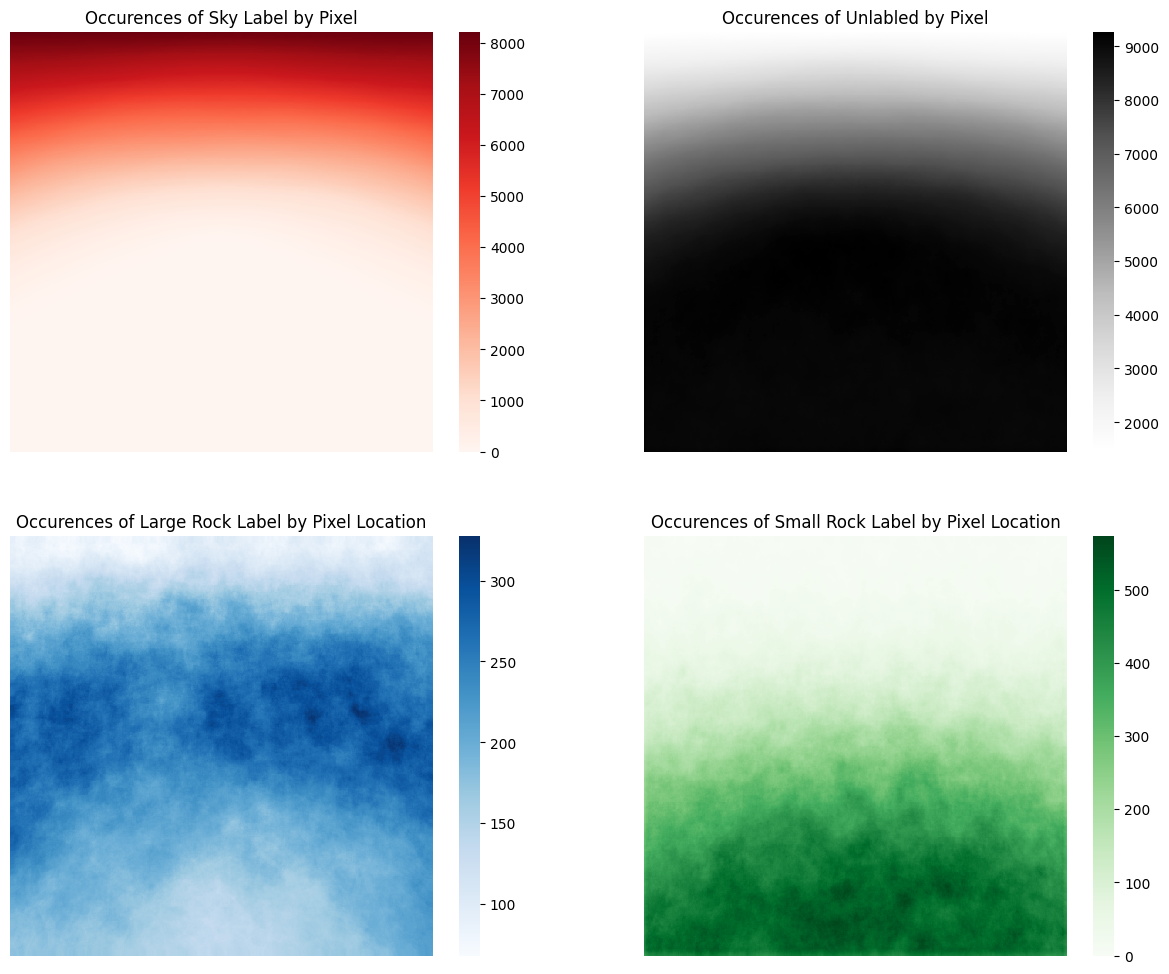

In [16]:
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (15,12))
sns.heatmap(red_hm, ax = axes[0,0], cmap = 'Reds')
sns.heatmap(blue_hm, ax = axes[1,0], cmap = 'Blues')
sns.heatmap(green_hm, ax = axes[1,1], cmap = 'Greens')
sns.heatmap(black_hm, ax = axes[0,1], cmap = 'Greys')

axes[0,0].set_title("Occurences of Sky Label by Pixel Location")
axes[0,1].set_title("Occurences of Unlabled by Pixel Location")
axes[1,0].set_title("Occurences of Large Rock Label by Pixel Location")
axes[1,1].set_title("Occurences of Small Rock Label by Pixel Location")

for ax in axes.flatten():
    t = ax.set_xticks([])
    t = ax.set_yticks([])

In [17]:
#Sanity check, view few mages
def peek_images(sample_images, sample_masks=None, encode=None, color_scale=None, file_name=None, mask_name=None, predict=None, model=None, sample_images2=None, model_alt=None):
  """
  Function to plot a randomly selected training set (or validation set if given validation filepaths)

  Parameters:
    sample_images: image in np array
    sample_masks: mask in np array
    encode: Boolean to set encoding type 'uint8' or not
    color_scale: set to 'gray' to set grayscale
    file_name: filename to display in image plot tile
    mask_name: filename to display in mask plot tile
    predict: Boolean, set to True if want to show prediction plots
    model: instance of model object to use .predict() on

  Return:
    None
  """
  image_number = random.randint(0, sample_images.shape[0]-1)

  plt.figure(figsize=(12, 6))
  
  # Original Image
  if predict is not None and model is not None and model_alt is not None:
    plt.subplot(141)
  elif predict is not None and model is not None and model_alt is None:
    plt.subplot(131)
  else:
    plt.subplot(121)

  if encode == 'uint8':
    plt.imshow(sample_images.astype(('uint8')))
  else:
    plt.imshow(sample_images)
  plt.title('Original:\n{}'.format(file_name), fontdict = {'fontsize' : 8})
  plt.axis('off')
  
  # Mask
  if predict is not None and model is not None and model_alt is not None:
    plt.subplot(142)
  elif predict is not None and model is not None and model_alt is None:
    plt.subplot(132)
  else:
    plt.subplot(122)

  if encode == 'uint8':
    if color_scale == 'gray':
      plt.imshow(sample_masks.astype(('uint8')), cmap='gray')
    else:
      plt.imshow(sample_masks.astype(('uint8')))
  else:
    if color_scale == 'gray':
      plt.imshow(sample_masks, cmap='gray')
    else:
      plt.imshow(sample_masks)
  plt.title('Ground Truth Mask:\n{}'.format(mask_name), fontdict = {'fontsize' : 8})
  plt.axis('off')

  if predict is not None and model is not None and model_alt is not None:
    plt.subplot(143)
  if predict is not None and model is not None and model_alt is None:
    plt.subplot(133)
    # Prediction

  if predict is not None:
    # Turn (612, 612, 3) to (1, 612, 612, 3)
    if len(sample_images.shape) == 3:
      sample_images = np.expand_dims(sample_images, axis=0)

    # Predict image
    predicted_image = model.predict(sample_images)
    predicted_image = predicted_image[0,::,::,::]
    # Reverse one hot encode predicted mask
    predicted_image_decoded = reverse_one_hot_encode(predicted_image)

    
    if encode == 'uint8':
      if color_scale == 'gray':
        plt.imshow(predicted_image_decoded.astype(('uint8')), cmap='gray')
      else:
        plt.imshow(predicted_image_decoded.astype(('uint8')))
    else:
      if color_scale == 'gray':
        plt.imshow(predicted_image_decoded, cmap='gray')
      else:
        plt.imshow(predicted_image_decoded)
    plt.title('Predicted Mask {}:'.format(model.name), fontdict = {'fontsize' : 8})
    plt.axis('off')

  if predict is not None and model is not None and model_alt is not None:
    # Prediction #2

    # Turn (612, 612, 3) to (1, 612, 612, 3)
    if len(sample_images2.shape) == 3:
      sample_images2 = np.expand_dims(sample_images2, axis=0)

    # Predict image
    predicted_image = model_alt.predict(sample_images2)
    predicted_image = predicted_image[0,::,::,::]
    # Reverse one hot encode predicted mask
    predicted_image_decoded = reverse_one_hot_encode(predicted_image)

    plt.subplot(144)
    if encode == 'uint8':
      if color_scale == 'gray':
        plt.imshow(predicted_image_decoded.astype(('uint8')), cmap='gray')
      else:
        plt.imshow(predicted_image_decoded.astype(('uint8')))
    else:
      if color_scale == 'gray':
        plt.imshow(predicted_image_decoded, cmap='gray')
      else:
        plt.imshow(predicted_image_decoded)
    plt.title('Predicted Mask {}:'.format(model_alt.name), fontdict = {'fontsize' : 8})
    plt.axis('off')

  plt.show()


In [18]:
def peek_masks_breakdown(sample_images, sample_masks=None, encode=None, color_scale=None, file_name=None, mask_name=None, predict=None, model=None):
  """
  Function to plot a randomly selected prediction mask and breakdown channels
  
  Parameters:
    sample_images: image in np array
    sample_masks: mask in np array
    encode: Boolean to set encoding type 'uint8' or not
    color_scale: set to 'gray' to set grayscale
    file_name: filename to display in image plot tile
    mask_name: filename to display in mask plot tile
    predict: Boolean, set to True if want to show prediction plots
    model: instance of model object to use .predict() on

  Return:
    None
  """
  image_number = random.randint(0, sample_images.shape[0]-1)

  plt.figure(figsize=(12, 6))

  # Turn (612, 612, 3) to (1, 612, 612, 3)
  if len(sample_images.shape) == 3:
    sample_images = np.expand_dims(sample_images, axis=0)

  # Predict image
  predicted_image = model.predict(sample_images)
  predicted_image = predicted_image[0,::,::,::]
  predicted_image = rescale(predicted_image)

  # Reverse one hot encode predicted mask
  predicted_image_decoded = reverse_one_hot_encode(predicted_image)
  predicted_image_decoded = rescale(predicted_image_decoded)

  # Predicted
  plt.subplot(4,2,1)

  if encode == 'uint8':
    if color_scale == 'gray':
      plt.imshow(predicted_image_decoded.astype(('uint8')), cmap='gray')
    else:
      plt.imshow(predicted_image_decoded.astype(('uint8')))
  else:
    if color_scale == 'gray':
      plt.imshow(predicted_image_decoded, cmap='gray')
    else:
      plt.imshow(predicted_image_decoded)
  plt.title('Predicted Mask {}:'.format(model.name), fontdict = {'fontsize' : 8})
  plt.axis('off')

  labels = ['Sky, Red:', 
            'Big Rocks, Blue:',
            'Small Rocks, Green:',
            'Unlabeled, Grey:',
            ]

  all_colored_channel_activations = 0

  for i in range(predicted_image.shape[-1]-1):
    # Channels
    plt.subplot(4,2,i+2)
    plt.imshow(predicted_image[::,::,i])

    pixels_activated = np.count_nonzero(predicted_image[::,::,i] >= 1)
    percent_pixels_activated = round(pixels_activated / np.size(predicted_image[::,::,i]) * 100, 5)

    all_colored_channel_activations+=percent_pixels_activated

    plt.title(labels[i] + '{}% Pixels Activated'.format(percent_pixels_activated), fontdict = {'fontsize' : 8})
    plt.axis('off')
  
  # Unknown Channel
  plt.subplot(4,2,8)
  plt.imshow(predicted_image[::,::,6])

  plt.title(labels[-1] + '{}% Pixels Activated'.format(round(100 - all_colored_channel_activations, 5)), fontdict = {'fontsize' : 8})
  plt.axis('off')
    
  plt.show()


In [19]:
#Sanity check, view few mages
def peek_images_test(sample_images, sample_masks=None, encode=None, color_scale=None, file_name=None, mask_name=None, predict=None, model=None):
  """
  Function to plot a randomly selected testing set

  Parameters:
    sample_images: image in np array
    sample_masks: mask in np array
    encode: Boolean to set encoding type 'uint8' or not
    color_scale: set to 'gray' to set grayscale
    file_name: filename to display in image plot tile
    mask_name: filename to display in mask plot tile
    predict: Boolean, set to True if want to show prediction plots
    model: instance of model object to use .predict() on

  Return:
    None
  """
  image_number = random.randint(0, sample_images.shape[0]-1)

  plt.figure(figsize=(12, 6))
  
  # Original Image
  plt.subplot(121)

  if encode == 'uint8':
    plt.imshow(sample_images.astype(('uint8')))
  else:
    plt.imshow(sample_images)
  plt.title('Original:\n{}'.format(file_name), fontdict = {'fontsize' : 8})
  plt.axis('off')
  
  # Prediction
  plt.subplot(122)

  # Turn (X, Y, 3) to (1, X, Y, 3)
  if len(sample_images.shape) == 3:
    sample_images = np.expand_dims(sample_images, axis=0)

  # Predict image
  predicted_image = model.predict(sample_images)
  predicted_image = predicted_image[0,::,::,::]
  # Reverse one hot encode predicted mask
  predicted_image_decoded = reverse_one_hot_encode(predicted_image)

  if encode == 'uint8':
    if color_scale == 'gray':
      plt.imshow(predicted_image_decoded.astype(('uint8')), cmap='gray')
    else:
      plt.imshow(predicted_image_decoded.astype(('uint8')))
  else:
    if color_scale == 'gray':
      plt.imshow(predicted_image_decoded, cmap='gray')
    else:
      plt.imshow(predicted_image_decoded)
  plt.title('Predicted Mask {}:'.format(model.name), fontdict = {'fontsize' : 8})
  plt.axis('off')

  plt.show()


In [20]:
def sanity_check(sample_images, sample_masks=None, encode=None, color_scale=None, predict=None, model=None, model_alt=None, predicted_breakdown=None, imsize=None, imsize_alt=None):
  """
  Function to get a training set (or validation set if given validation filepaths) and calls plotting functions
  
  Parameters:
    sample_images: image in np array
    sample_masks: mask in np array
    encode: Boolean to set encoding type 'uint8' or not
    color_scale: set to 'gray' to set grayscale
    file_name: filename to display in image plot tile
    mask_name: filename to display in mask plot tile
    predict: Boolean, set to True if want to show prediction plots
    model: instance of model object to use .predict() on

  Return:
    None
  """
  image_number = random.randint(0, len(os.listdir(sample_images))-1)

  file_name = sorted(os.listdir(sample_images))[image_number]
  image_file = sorted(os.listdir(sample_images))[image_number]
  image = np.array(plt.imread(sample_images + image_file))
  
  if sample_masks is not None:
    mask_name = sorted(os.listdir(sample_masks))[image_number]
    mask_file = sorted(os.listdir(sample_masks))[image_number]
    mask = np.array(plt.imread(sample_masks + mask_file))

  if imsize is not None and sample_masks is not None:
    image =  cv2.resize(image, (imsize, imsize))
    mask =  cv2.resize(mask, (imsize, imsize))
  elif imsize is not None and sample_masks is None:
    image =  cv2.resize(image, (imsize, imsize))

  image1 = copy.deepcopy(image)

  if model_alt:
    image2 = copy.deepcopy(image)
    if imsize_alt is not None and sample_masks is not None:
      image2 =  cv2.resize(image, (imsize_alt, imsize_alt))
      mask =  cv2.resize(mask, (imsize_alt, imsize_alt))
    elif imsize_alt is not None and sample_masks is None:
      image2 =  cv2.resize(image, (imsize_alt, imsize_alt))
  else:
    image2 = None

  # Compare image and mask only
  if predicted_breakdown is None and sample_masks is not None:
    peek_images(sample_images=image1, sample_masks=mask, encode=encode, color_scale=color_scale, file_name=file_name, mask_name=mask_name, predict=predict, model=model)
  # Compare original image and mask with predicted mask for model 1 or with model 1 and model 2
  elif predicted_breakdown is not None and sample_masks is not None:
    image1 = preprocessor_images(image1)
    mask = preprocessor_images(mask)
    if image2 is not None:
      image2 = preprocessor_images(image2)
    peek_images(sample_images=image1, sample_masks=mask, encode=encode, color_scale=color_scale, file_name=file_name, mask_name=mask_name, predict=predict, model=model, sample_images2=image2, model_alt=model_alt)
    peek_masks_breakdown(sample_images=image1, sample_masks=mask, encode=encode, color_scale=color_scale, file_name=file_name, mask_name=mask_name, predict=predict, model=model)
  # Test data, no masks
  elif sample_masks is None:
    image1 = preprocessor_images(image1)
    peek_images_test(sample_images=image1, encode=encode, color_scale=color_scale, file_name=file_name, predict=predict, model=model)
    # peek_masks_breakdown(sample_images=image, encode=encode, color_scale=color_scale, file_name=file_name, predict=predict, model=model)


In [21]:
def binarize(img, threshold=128):
    """
    Function to binarize images at some threshold pixel value

    Parameters:
    img: image in numpy matrix
    threshold: pixel threshold to binarize

    Return:
    img: binarized image in numpy matrix
    """
    # Binarize the image
    if np.max(img) > 1:
        img[img > threshold] = 255
        img[img <= threshold] = 0
    else:
        img[img > (threshold/255)] = 255
        img[img <= (threshold/255)] = 0    

    return img

In [22]:
def rescale(img):
  """
  Function to rescale image from 0 to 255 to between 0 and 1. 
  
  Parameters:
    img: image in numpy matrix

  Return:
    img: rescaled image in numpy matrix
  """
  if np.max(img) > 1:
    img = np.multiply(img, 1./255)

  return img

In [23]:
def one_hot_encode(img, class_map=None):
  """
  Function to one hot encode ground truth masks

  Parameters:
    img: mask image where each channel represents a color channel
    class_map: class_df

  Return:
    frame: one hot encoded image where each channel represents a class
  """

  if class_map is None:
    class_map = pd.DataFrame({'name':['Sky', 'Big Rocks', 'Small Rocks', 'Unlabeled'], 
                              'r':[255,0,0,0], 
                              'g':[0,0,255,0],
                              'b':[0,255,0,0]})

  img_copy = copy.deepcopy(img)
  frame = np.zeros((img.shape[0], img.shape[1], len(class_map))).astype('int')

  class_channel = 0

  for index, row in class_map.iterrows():
    new_img = copy.deepcopy(img_copy[::,::,::])

    R = new_img[::,::,0]
    G = new_img[::,::,1]
    B = new_img[::,::,2]

    # OHE each class type
    new_img[(R == row['r']/255) & (G == row['g']/255) & (B == row['b']/255)] = 2
    new_img[new_img < 2] = 0
    new_img[new_img == 2] = 1

    new_channel = copy.deepcopy(new_img[::,::,0])

    # Take first layer since they are all the same and put into OHE mask
    frame[::,::,class_channel] = new_channel

    class_channel+=1

  return frame


In [24]:
def reverse_one_hot_encode(img, class_map=None):
  """
  Function to reverse one hot encode 4 class channel to 3 channel RGB mask

  Parameters:
    img: image of one hot encoded mask image where each channel represents a class
    class_map: class_df

  Return:
    rgb_img: reversed one hot encoded image of RGB channels
  """

  if class_map is None:
    class_map = pd.DataFrame({'name':['Sky', 'Big Rocks', 'Small Rocks', 'Unlabeled'], 
                              'r':[255,0,0,0], 
                              'g':[0,0,255,0],
                              'b':[0,255,0,0]})
    
  img = binarize(img)
  
  all_red_channels = []
  all_green_channels = []
  all_blue_channels = []

  class_channel = 0

  for index, row in class_map.iterrows():

    current_class_channel = copy.deepcopy(img[::,::,class_channel])

    temp_rgb = np.zeros((img.shape[0], img.shape[1], 3))

    # if pixel value > 128 then put 0s in R, 255 in g, 255 in b
    # or corresponding RGB for each class

    if row['r'] > 0:
      temp_rgb[::,::,0] = current_class_channel
    if row['g'] > 0:
      temp_rgb[::,::,1] = current_class_channel
    if row['b'] > 0:
      temp_rgb[::,::,2] = current_class_channel

    all_red_channels.append(copy.deepcopy(temp_rgb[::,::,0]))
    all_green_channels.append(copy.deepcopy(temp_rgb[::,::,1]))
    all_blue_channels.append(copy.deepcopy(temp_rgb[::,::,2]))

    class_channel += 1

  red_stack = np.dstack(tuple(all_red_channels))
  green_stack = np.dstack(tuple(all_green_channels))
  blue_stack = np.dstack(tuple(all_blue_channels))

  rgb_img = np.zeros((img.shape[0], img.shape[1], 3))

  rgb_img[::,::,0] = np.max(red_stack, axis=2)
  rgb_img[::,::,1] = np.max(green_stack, axis=2)
  rgb_img[::,::,2] = np.max(blue_stack, axis=2)

  return rgb_img

In [25]:
def preprocessor_images(image, b_threshold=128):
    """
    Function to combine preprocessing steps to feed into ImageDataGenerator.
    'Masks' have to binarize then rescale. 'Images' just have to rescale.

    Parameters:
    image: image in numpy (x,y,3)
    b_threshold: binary threshold value for pixels, default at 128.

    Return:
    final_img: final image to return from preprocessor after going through 
            all processing steps.
    """
    final_img = rescale(image)

    return final_img

In [26]:
def preprocessor_masks(image, b_threshold=128, class_map=None):
    """
    Function to combine preprocessing steps to feed into ImageDataGenerator.
    'Masks' have to binarize then rescale. 'Images' just have to rescale.

    Parameters:
    image: image in numpy (x,y,3)
    class_map: mapping dataframe of classes and their corresponding RGB values for one hot encoding into separate channels
    b_threshold: binary threshold value for pixels, default at 128.

    Return:
    final_img: final image to return from preprocessor after going through 
            all processing steps.
    """
    image = one_hot_encode(image, class_map)
    final_img = rescale(image)

    return final_img

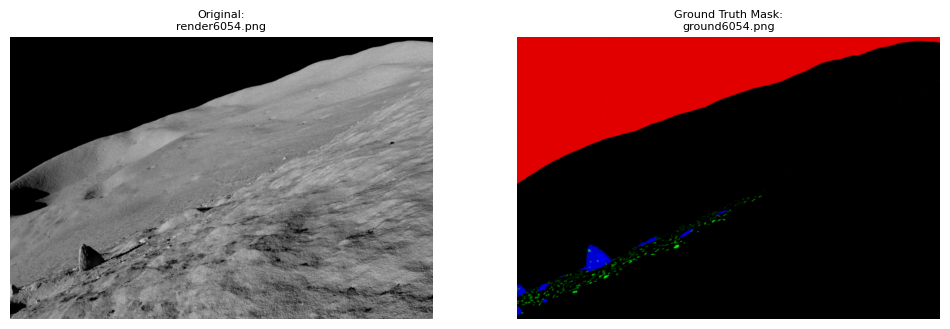

In [78]:
# Randomly selects image and mask from sample set and plot just to double check everything is working correctly.
# Run this a few times to check on a few different image and mask sets
sanity_check(DATA_PATH + '/images/render/' , DATA_PATH + '/images/ground/')